In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
from matplotlib import colors
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Patch
from plot_utils import set_size

In [2]:
# PLOT PARAMS
plt.rcParams['font.size'] = 8                  
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['lines.linewidth'] = 1           
plt.rcParams['lines.markersize'] = 3
plt.rcParams['figure.figsize'] = [3.6,1.3] 
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 1.
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 1.
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['xtick.major.pad']=1.5
plt.rcParams['ytick.major.pad']=1.5
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.handlelength'] = plt.rcParams['legend.handleheight']
plt.rcParams['legend.columnspacing'] = 0.8
plt.rcParams['legend.handletextpad'] = 0.4

plt.rcParams['axes.linewidth'] = 0.5

fmt = 'eps'

In [3]:
# bifurcation data
phis_bif = np.genfromtxt('../bifurcation_diagram/phis_bif.dat')[:-2]

# beta04
bif_data_exp04 = np.genfromtxt('../data/bifurcation_diagram/bifurcation_data_beta0-4_exp_revised.dat').reshape(20,200,100)
bif_data_sim04 = np.genfromtxt('../data/bifurcation_diagram/bifurcation_data_beta0-4_sim_revised.dat').reshape(20,200,100)

/tmp/ipykernel_34540/2943506888.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


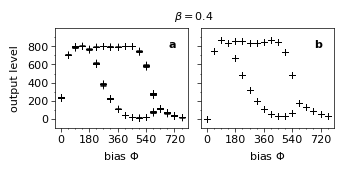

In [4]:
if fmt == 'pdf':
    raster = True
    dpi = 300
elif fmt == 'eps':
    raster = False
    dpi = None

fig = plt.figure(constrained_layout=False)

gs = GridSpec(1,2,figure=fig,wspace=0.1)

ax_exp04 = fig.add_subplot(gs[0])
ax_sim04 = fig.add_subplot(gs[1])

axes_exp = [ax_exp04]
axes_sim = [ax_sim04]
axes = axes_exp + axes_sim
ax_label = fig.add_subplot(gs[:,:])
for ax in [ax_label]:
    plt.setp(ax.spines.values(), visible=False)
    # remove ticks and labels for the left axis
    ax.tick_params(left=False)
    #remove background patch
    ax.patch.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
ax_label.set_ylabel('output level',labelpad=25)
ax_label.set_title(r'$\beta = 0.4$')

biftickstep = 4

s = 15
marker='+'
alpha=1
lw=0.5
last_steps = 50

# Bifurcation diagrams
for i,phi in enumerate(phis_bif):  
    ax_exp04.scatter([phi]*last_steps,bif_data_exp04[i,-last_steps:,0],rasterized=raster,
                     marker=marker,color='black',s=s,alpha=alpha,linewidths=lw)
    ax_sim04.scatter([phi]*last_steps,bif_data_sim04[i,-last_steps:,0],rasterized=raster,
                     marker=marker,color='black',s=s,alpha=alpha,linewidths=lw)

for ax,letter in zip(axes,'abcdef'):
    ax.set_xticks(phis_bif[::biftickstep])
    ax.set_xticks(phis_bif,minor=True)
    ax.set_yticks(np.arange(0,1000,100),minor=True)
    ax.set_yticks(np.arange(0,1000,200))
    ax.text(0.85,0.8,r'$\mathbf{{{}}}$'.format(letter),transform=ax.transAxes)
    ax.set_ylim([-100,1000])
for ax in axes:
    ax.set_xticklabels(phis_bif[::biftickstep].astype(int))
    ax.set_xlabel(r'bias $\Phi$')

for ax in axes:
    ax.set_yticklabels([])
ax_exp04.set_yticklabels(np.arange(0,1000,200))
ax_sim04.set_yticklabels([])

plt.tight_layout()
plt.savefig(fmt+'/fig03_bifurcation_diagram_beta0-4.'+fmt,bbox_inches='tight',dpi=dpi)